## Python for Finance - TSLA Stock Analysis Project - A.M.M. ICL ICBS ESB '24

###### ** Markdown cells contain subtitles of processes and sequenced steps underlying reasoning, # comments for code elaboration**

## We begin by importing our prerequisites:


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning

### We load the raw data:

In [22]:
###Save included data to own desired location
df = pd.read_csv('C:/Users/amjmo/Downloads/TSLA_10YR_raw_(3).csv')

### We try shift 'date' to "datetime" target format

In [23]:
df['Date'] = pd.to_datetime(df['Date'])

In [24]:
df.set_index('Date', inplace=True)

### Set the "Date" column index

In [25]:
df.sort_index(inplace=True)

### Remove duplicates in data

In [26]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

### Check the first and last few lines of the data  

In [27]:
print(df.head())

                 Open       High       Low      Close  Adj Close      Volume
Date                                                                        
2014-01-02   9.986667  10.165333  9.770000  10.006667  10.006667  92826000.0
2014-01-03  10.000000  10.146000  9.906667   9.970667   9.970667  70425000.0
2014-01-06  10.000000  10.026667  9.682667   9.800000   9.800000  80416500.0
2014-01-07   9.841333  10.026667  9.683333   9.957333   9.957333  75511500.0
2014-01-08   9.923333  10.246667  9.917333  10.085333  10.085333  92448000.0


In [28]:
print(df.tail())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-12-22  256.760010  258.220001  251.369995  252.539993  252.539993   
2023-12-26  254.490005  257.970001  252.910004  256.609985  256.609985   
2023-12-27  258.350006  263.339996  257.519989  261.440002  261.440002   
2023-12-28  263.660004  265.130005  252.710007  253.179993  253.179993   
2023-12-29  255.100006  255.190002  247.429993  248.479996  248.479996   

                 Volume  
Date                     
2023-12-22   93249800.0  
2023-12-26   86892400.0  
2023-12-27  106494400.0  
2023-12-28  113619900.0  
2023-12-29  100615300.0  


### Check the data overview

In [29]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2502 non-null   float64
 1   High       2506 non-null   float64
 2   Low        2511 non-null   float64
 3   Close      2509 non-null   float64
 4   Adj Close  2513 non-null   float64
 5   Volume     2503 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB
None


### Fill in the missing 'Open' price to complete Rule 1, and use the forward fill mode of the 'ffill' method:

In [30]:
df['Open'] = df['Open'].ffill()

### This step fills in the missing “Close” price and uses the backfill mode of the “bfill” method:

In [31]:
df['Close'] = df['Close'].bfill()

### This step fills in the missing values for the “Adj Close” column as Rule 3

In [32]:
df['Adj Close'] = df['Adj Close'].fillna(df['Close'])

### This step uses “interpolate” for missing values

In [33]:
df['High'] = df['High'].interpolate(method='linear')
df['Low'] = df['Low'].interpolate(method='linear')

### The missing values in the 'Volume' column are filled with the 'Close' price and the 'Open' price:

In [34]:
close_equals_open = df['Close'] == df['Open']
median_volume = df['Volume'].median()

### "loc" is used to locate the position where the "Close" price equals the "Open" price and fill it in with "0"

In [35]:
df.loc[close_equals_open, 'Volume'] = df.loc[close_equals_open, 'Volume'].fillna(0)

In [36]:
df['Volume'] = df['Volume'].fillna(median_volume)

### Verify the results of data cleaning

In [37]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2014-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2516 non-null   float64
 1   High       2516 non-null   float64
 2   Low        2516 non-null   float64
 3   Close      2516 non-null   float64
 4   Adj Close  2516 non-null   float64
 5   Volume     2516 non-null   float64
dtypes: float64(6)
memory usage: 137.6 KB
None


### Extract data from 2019

In [38]:
df = df.loc['2019-01-01':]

### Verify the results of data cleaning

In [39]:
print(df.head())

                 Open       High        Low      Close  Adj Close       Volume
Date                                                                          
2019-01-02  20.406668  21.008667  19.920000  20.674667  20.674667  174879000.0
2019-01-03  20.466667  20.626667  19.825333  20.024000  20.024000  104478000.0
2019-01-04  20.400000  21.200001  20.181999  21.179333  21.179333  110911500.0
2019-01-07  21.448000  22.449333  21.183332  22.330667  22.330667  113268000.0
2019-01-08  22.797333  22.934000  21.801332  22.356667  22.356667  105127500.0


### Save the cleaned data into new file

In [41]:
###Save cleaned data to own desired location
df.to_csv('C:/Users/amjmo/Downloads/TSLA_10YR_clean_(11).csv')

# Feature Engineering

### We read in our cleaned data and summarily check for any error

In [42]:
df = pd.read_csv('C:/Users/amjmo/Downloads/TSLA_10YR_clean_(11).csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   float64
dtypes: float64(6), object(1)
memory usage: 68.9+ KB


### "Boiler plate" date indexing and addition of 'Year' column 

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
#Year added now for later Key Dates operations
df['Year'] = df['Date'].dt.year
df = df.set_index('Date').sort_index().drop_duplicates()
df

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000.0,2019
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000.0,2019
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500.0,2019
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000.0,2019
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500.0,2019
...,...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800.0,2023
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400.0,2023
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400.0,2023


### Daily Returns:

In [44]:
returns = df['Daily Return'] = df['Adj Close'].pct_change()
returns

Date
2019-01-02         NaN
2019-01-03   -0.031472
2019-01-04    0.057697
2019-01-07    0.054361
2019-01-08    0.001164
                ...   
2023-12-22   -0.007701
2023-12-26    0.016116
2023-12-27    0.018822
2023-12-28   -0.031594
2023-12-29   -0.018564
Name: Adj Close, Length: 1258, dtype: float64

### Log Returns:

In [45]:
#"Prev Close" column created to enable log return calculation
df['Prev Close'] = df['Adj Close'].shift(1)
log_returns = np.log(df['Adj Close'] / df['Prev Close'])
log_returns

Date
2019-01-02         NaN
2019-01-03   -0.031978
2019-01-04    0.056094
2019-01-07    0.052935
2019-01-08    0.001164
                ...   
2023-12-22   -0.007731
2023-12-26    0.015988
2023-12-27    0.018647
2023-12-28   -0.032104
2023-12-29   -0.018738
Length: 1258, dtype: float64

### Surges

#### 1. We define mean return

#### 2. We define the surge threshold as 4 standard deviations above the mean

#### 3. We define the surge condition

#### 4. We subset the dataframe where daily returns are higher than the surge threshold

In [46]:
mean_return = df['Daily Return'].mean()

return_threshold = mean_return + (df['Daily Return'].std() * 4)

condition = df['Daily Return'] > return_threshold

df[condition]

,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Prev Close
Date,,,,,,,,,
2019-10-24,19.891333,20.328667,19.280001,19.978666,19.978666,445813500.0,2019,0.176692,16.978666
2020-02-03,44.912666,52.409332,44.901333,52.000000,52.000000,705975000.0,2020,0.198949,43.371334
2020-03-19,24.980000,30.133333,23.897333,28.509333,28.509333,452932500.0,2020,0.183877,24.081333
2021-03-09,202.726669,226.029999,198.403336,224.526672,224.526672,202569900.0,2021,0.196412,187.666672


### Volume Spike

#### 1. We find the mean volume

#### 2. We define the spike threshold as 6 standard deviations above the mean

#### 3. We define the spike condition

#### 4. We subset the dataframe where volumes are higher than the spike threshold

In [47]:
mean_volume = df['Volume'].mean()

return_threshold = mean_volume + (df['Volume'].std() * 6)

condition = df['Volume'] > return_threshold

df[condition]

,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Prev Close
Date,,,,,,,,,
2020-02-03,44.912666,52.409332,44.901333,52.000000,52.000000,705975000.0,2020,0.198949,43.371334
2020-02-04,58.863998,64.599335,55.591999,59.137333,59.137333,914082000.0,2020,0.137256,52.000000
2020-02-05,54.883999,56.398666,46.940666,48.980000,48.980000,726357000.0,2020,-0.171758,59.137333
2020-12-18,222.966660,231.666672,209.513336,231.666672,231.666672,666378600.0,2020,0.059613,218.633331


### Simple Moving Average

In [48]:
df['20-day MA'] = df['Adj Close'].rolling(window=20).mean()
df

,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Prev Close,20-day MA
Date,,,,,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000.0,2019,NaN,NaN,NaN
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000.0,2019,-0.031472,20.674667,NaN
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500.0,2019,0.057697,20.024000,NaN
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000.0,2019,0.054361,21.179333,NaN
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500.0,2019,0.001164,22.330667,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800.0,2023,-0.007701,254.500000,244.503500
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400.0,2023,0.016116,252.539993,245.529999
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400.0,2023,0.018822,256.609985,246.265999


### 20-Day Standard Deviation [Volatility]

In [49]:
df['20-day SD'] = df['Daily Return'].rolling(window=20).std()
df

,Open,High,Low,Close,Adj Close,Volume,Year,Daily Return,Prev Close,20-day MA,20-day SD
Date,,,,,,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000.0,2019,NaN,NaN,NaN,NaN
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000.0,2019,-0.031472,20.674667,NaN,NaN
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500.0,2019,0.057697,20.024000,NaN,NaN
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000.0,2019,0.054361,21.179333,NaN,NaN
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500.0,2019,0.001164,22.330667,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,256.760010,258.220001,251.369995,252.539993,252.539993,93249800.0,2023,-0.007701,254.500000,244.503500,0.021398
2023-12-26,254.490005,257.970001,252.910004,256.609985,256.609985,86892400.0,2023,0.016116,252.539993,245.529999,0.021574
2023-12-27,258.350006,263.339996,257.519989,261.440002,261.440002,106494400.0,2023,0.018822,256.609985,246.265999,0.019685


### Bollinger Bands

#### 1. We calculate the High and Low Bollinger Bands

#### 2. Creating plot with added SMA line

#### 3. We plot the High and Low Bollinger Bands

#### 4. Display

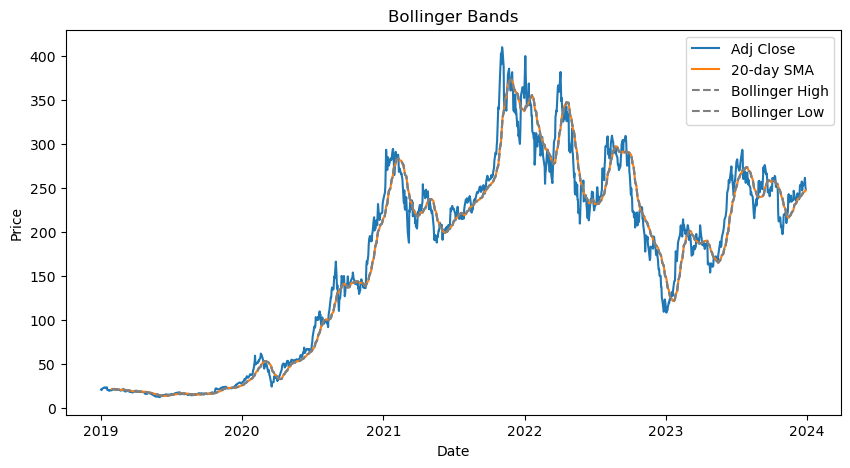

In [50]:
df['Bollinger High'] = df['20-day MA'] + 2 * df['20-day SD']
df['Bollinger Low'] = df['20-day MA']  - 2 * df['20-day SD']

plt.figure(figsize=(10,5))
plt.plot(df['Adj Close'], label='Adj Close')
plt.plot(df["20-day MA"], label="20-day SMA")

plt.plot(df['Bollinger High'], label='Bollinger High', linestyle='--', color='grey')
plt.plot(df['Bollinger Low'], label='Bollinger Low', linestyle='--', color='grey')
plt.fill_between(df.index, df['Bollinger High'], df['Bollinger Low'], color='grey', alpha=0.1)
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')

plt.legend()
plt.show()

# Key Dates

### Date of Highest Volatility Day by Year:

In [51]:
highest_volatility_day = df.loc[df.groupby('Year')['20-day SD'].idxmax(), ['Year', '20-day SD']]
highest_volatility_day

,Year,20-day SD
Date,,
2019-10-29,2019,0.047500
2020-03-25,2020,0.100268
2021-03-19,2021,0.065815
2022-06-06,2022,0.057156
2023-01-23,2023,0.059497


### Date of Largest Price Surge by Year:

In [52]:
largest_price_surge_day = df.loc[df.groupby('Year')['Daily Return'].idxmax(), ['Year', 'Daily Return']]
largest_price_surge_day 

,Year,Daily Return
Date,,
2019-10-24,2019,0.176692
2020-02-03,2020,0.198949
2021-03-09,2021,0.196412
2022-01-03,2022,0.135317
2023-01-27,2023,0.110002


### Date of Largest Price Drop by Year:

In [53]:
largest_price_drop_day = df.loc[df.groupby('Year')['Daily Return'].idxmin(), ['Year', 'Daily Return']]
largest_price_drop_day 

,Year,Daily Return
Date,,
2019-07-25,2019,-0.136137
2020-09-08,2020,-0.210628
2021-11-09,2021,-0.119903
2022-04-26,2022,-0.121841
2023-01-03,2023,-0.122422


### Date of Highest Trading Volume by Year:

In [54]:
highest_volume_day = df.loc[df.groupby('Year')['Volume'].idxmax(), ['Year', 'Volume']]
highest_volume_day 

,Year,Volume
Date,,
2019-10-25,2019,450091500.0
2020-02-04,2020,914082000.0
2021-03-05,2021,268189500.0
2022-12-29,2022,221923300.0
2023-01-27,2023,306590600.0


### Date of Highest High by Year:

In [55]:
highest_high = df.loc[df.groupby('Year')['High'].idxmax(), ['Year', 'High']]
highest_high

,Year,High
Date,,
2019-12-27,2019,29.020666
2020-12-31,2020,239.573334
2021-11-04,2021,414.496674
2022-01-04,2022,402.666656
2023-07-19,2023,299.290009


### Date of Lowest Low by Year:

In [56]:
lowest_low = df.loc[df.groupby('Year')['Low'].idxmin(), ['Year', 'Low']]
lowest_low

,Year,Low
Date,,
2019-06-03,2019,11.799333
2020-03-18,2020,23.367332
2021-03-05,2021,179.830002
2022-12-28,2022,108.239998
2023-01-06,2023,101.809998


### Open and Close Values by Year:

In [57]:
annual_open_close = df.groupby('Year').agg({'Open': 'first', 'Close': 'last'})
annual_open_close

,Open,Close
Year,,
2019,20.406668,27.888666
2020,28.299999,235.223328
2021,239.820007,352.260010
2022,382.583344,123.180000
2023,118.470001,248.479996


# Data Visualisation

#### 1. Creating a main plot with Adj Close prices, Simple Moving Average, Bollinger Bands

##### 1a. Adding subplots for Volume and Volatility 

#### 2. We plot the Adjusted Close Prices, SMA, Bollinger Bands on the main plot [top subplot]

#### 3. We plot Volume on the second subplot

#### 4. We plot Volatility on the third subplot

#### 5. Display with key/legend


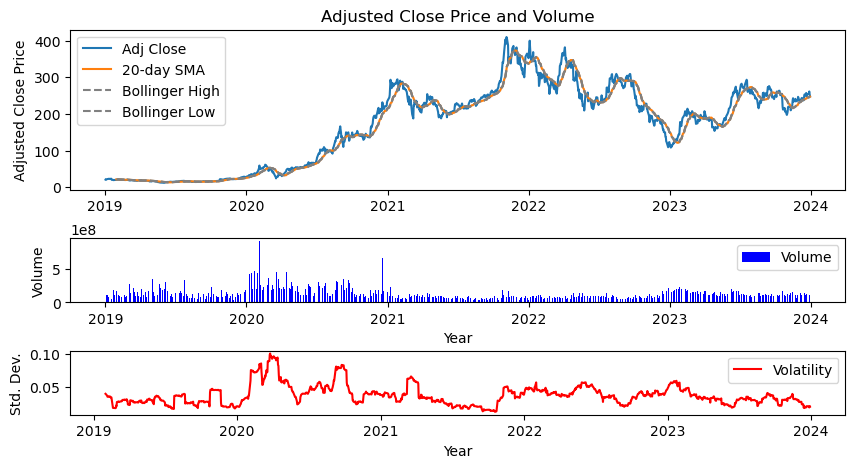

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(10, 5), gridspec_kw={'height_ratios': [5, 2, 2]})
fig.subplots_adjust(hspace=0.5)

ax1.plot(df.index, df['Adj Close'], label='Adj Close')
ax1.plot(df['20-day MA'], label= '20-day SMA')
ax1.plot(df['Bollinger High'], label='Bollinger High', linestyle='--', color='grey')
ax1.plot(df['Bollinger Low'], label='Bollinger Low', linestyle='--', color='grey')
ax1.set_title('Adjusted Close Price and Volume')
ax1.set_ylabel('Adjusted Close Price')
ax1.fill_between(df.index, df['Bollinger High'], df['Bollinger Low'], color='grey', alpha=0.1)

ax2.bar(df.index, df['Volume'], label='Volume', color='blue')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Year')

ax3.plot(df.index, df['20-day SD'], label='Volatility', color='red')
ax3.set_ylabel('Std. Dev.')
ax3.set_xlabel('Year')

ax1.legend()
ax2.legend()
ax3.legend()
plt.show()

# Histogram of Log Returns:

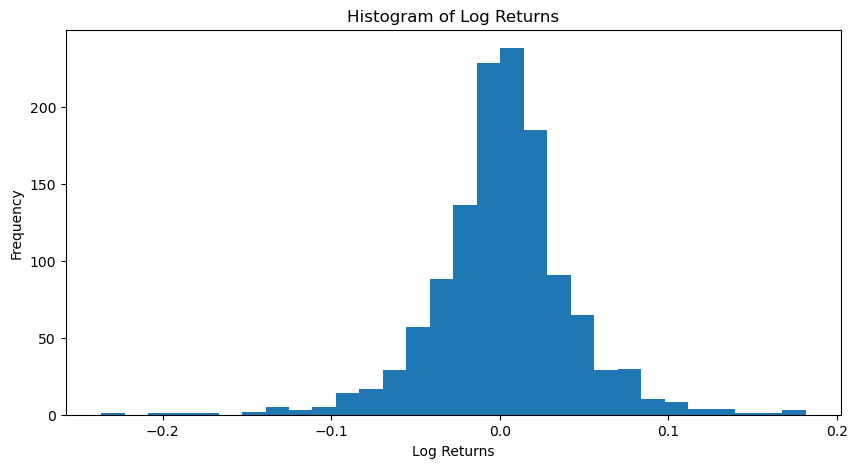

In [59]:
plt.figure(figsize=(10, 5))
plt.hist(log_returns, bins=30)
plt.title('Histogram of Log Returns')
plt.ylabel('Frequency')
plt.xlabel('Log Returns')
plt.show()

# Scatterplot of Volume vs Daily Returns:




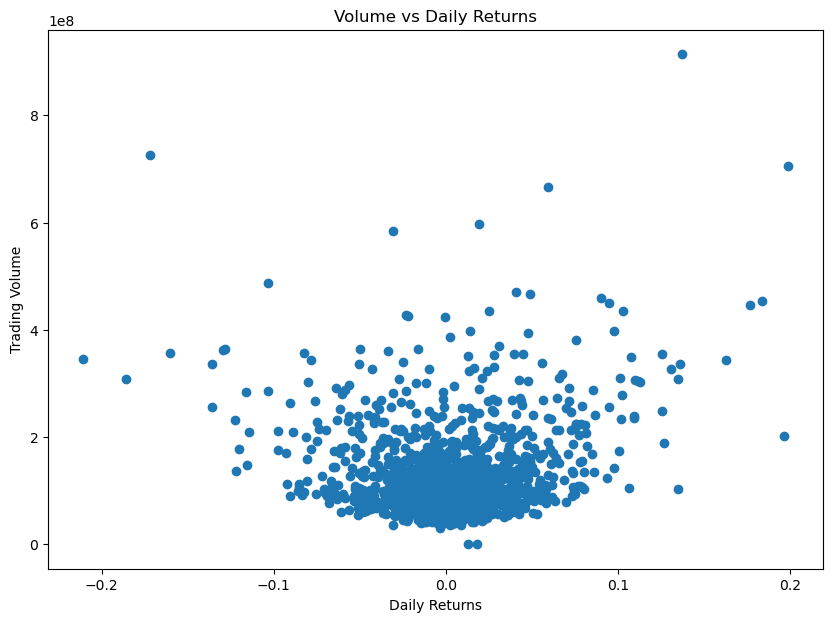

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(returns, df['Volume'])
plt.title('Volume vs Daily Returns')
plt.ylabel('Trading Volume')
plt.xlabel('Daily Returns')
plt.show()

# Report and Recommendation 


Based on the analysis of Tesla's (TSLA) historical trading data from 2019 to 2023, it is evident that the stock has experienced periods of high volatility and significant price movements. The correlation between trading volume and price fluctuations suggests that market sentiment heavily influences Tesla's stock. Despite the volatility, the overall trend has been positive, with frequent instances of substantial gains. Therefore, a cautious yet optimistic approach is recommended for increasing the firm's stake in Tesla, considering the potential for growth while being mindful of the inherent risks.



We believe that from 2019 to 2023, Tesla's stock has experienced significant volatility. 2020 was the year with the highest volatility, reaching 10.03%. In the same year, Tesla's stock rose 19.89% in a single day and fell -21.06% in a single day, indicating the wild volatility of its stock price. Investor interest was particularly strong in 2020, when the highest trading volume was recorded.

Tesla's share price reached a high of 11.80 in 2019, demonstrating its huge growth potential in the coming years. From 2019 to 2021, Tesla stock experienced significant growth, but there was a pullback in 2022. Overall, while Tesla's stock has strong growth potential, it also comes with high volatility. Therefore, we believe that a prudent investment strategy should be adopted. It is possible to modestly increase the proportion of investment in Tesla, but should ensure that the portfolio is diversified to balance the risk.



Tesla's stock SMA is closely aligned with the closing price trend. And the price has repeatedly hit or broken through the Bollinger Bands which indicates high volatility. Considering Standard Deviation, volatility is relatively low until 2020. It soars in 2021 and reaches a higher degree in 2022. Most of the normal distribution of returns is very positive. Although there are fewer opportunities for extremely high returns, it is also difficult in that sense to lose money. The log returns distribution indicates that most daily returns are close to zero,  but there is potential for high gains. The presence of extreme values also highlights the risk of significant losses.
As an investor, we recommend that the company consider the potential short-term volatility high risk, while at the same time bullish on Tesla's long-term growth prospects, so choose to increase holding the stock.


From the analysis we have conducted, it seems that Tesla is an ideal stock for investors with a high risk appetite who are willing to endure periods of high volatility in the expectation of substantial changes in stock price, which is often preferred by traders who seek to exploit volatility instead of directional trading. This would not have been a suitable stock for risk-averse investors looking to preserve capital, instead catering to risk-loving investors seeking quick capital accumulation in the recent past. Periods of massive stock price increase and high volatility in 2021-2022 coincide with the fiscal stimulus of the Covid-19 pandemic albeit with a slight lag, and stock prices have settled lower in recent years, likely coinciding with the end of Covid stimulus plus increased inflation and interest rates.

Tesla stock generally mirrors the NASDAQ and is buffeted by macro market conditions, though has lagged behind substantially in 2024, raising questions regarding further large 2021-style increases in stock price for the foreseeable future, instead demonstrating some indications of settling to lower volatility as indicated by log returns and 20-day rolling sigma. We would recommend a risk-neutral firm to cautiously increase TSLA positions, the value of which will likely increase to follow the NASDAQ, being wary that while volatility seems to be settling it remains high and TSLA hence entails greater tail risk, though this high volatility may be a desirable factor for risk-loving firms trading on volatility.
